### GOLD ORE

The goal of this project is to develope the model that predicts the amount of gold recovered from gold ore.

We have data in three files: training dataset, test dataset and full dataset. Full dataset contains the training and test sets with all the features. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
df_train[df_train.duplicated(keep=False)]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In the training dataset we have 16,860 entries. There are 87 columns, 86 are float and one column (date) is object. No duplicate rows.  

In [4]:
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
df_test[df_test.duplicated(keep=False)]

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


The test set doesn't have all the features that training set has. The test set also doesn't contain targets.

There are 5856 entries. 53 columns: 52 of the columns are float, one column (date) is object. No duplicate rows.

In [6]:
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')
df_full.info()
df_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Full set contains training and test set. It has 22716 entries with 87 columns.

Let's check that recovery is calculated correctly. In order to do this we'll use the training set to calculate recovery for the rougher.output.recovery feature according to the formula:

recovery = C*(F-T)/F*(C-T)*100%.

C = rougher.output.concentrate_au

T = rougher.output.tail_au

F = rougher.input.feed_au


In order to make calculations we first need to deal with NaNs. I think it would be correct here to delet missing values. 

In [7]:
df_train_n = df_train.dropna(subset=['rougher.output.recovery','rougher.output.concentrate_au','rougher.input.feed_au','rougher.output.tail_au'])

Let's look only at columns that we need for calculations.

In [8]:
recov = df_train_n[['rougher.output.concentrate_au','rougher.input.feed_au','rougher.output.tail_au']]

In [9]:
recov['recovery']=100*recov['rougher.output.concentrate_au']*(recov['rougher.input.feed_au']-recov['rougher.output.tail_au'])/(recov['rougher.input.feed_au']*(recov['rougher.output.concentrate_au']-recov['rougher.output.tail_au']))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now we'll find the MAE between our calculations and the feature values.

In [10]:
mae=mean_absolute_error(df_train_n['rougher.output.recovery'], recov['recovery'])
mae

1.1290254018238898e-14

MAE is very close to 0, we can conclude that recovery is calculated correctly. 

Some of the features that are present in the training set are not available in the test set. 
Let's find these features.

In [11]:
# Columns from training set
col_1 = df_train.columns

# Columns from test set
col_2 = df_test.columns

# using numpy.setdiff1d() method will get the unique values in col_1 that are not in col_2
diff = np.setdiff1d(col_1,col_2)
diff

array(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag',
       'final.output.tail_au', 'final.output.tail_pb',
       'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       

We can see that the type of these parameters are *output* (product parameters) and *calculation* (calculation characteristics).

In order to avoid target leakage we need to drop all these columns from training set. 

In [12]:
df_train = df_train.drop(diff, axis=1)

The type of the column 'data' is object. Let's convert it into date type using to_datetime() function. 

The type of other columns is fine.

In [13]:
df_train['date']=pd.to_datetime(df_train['date'],format='%Y-%m-%d')
df_test['date']=pd.to_datetime(df_test['date'],format='%Y-%m-%d')
df_full['date']=pd.to_datetime(df_full['date'],format='%Y-%m-%d')

Let's check how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage (primary purification and secondary purification).

In [14]:
au_ag_pb=df_full[['rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]
au_ag_pb.head()

,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,19.793808,34.174427,42.192020,11.500771,8.547551,6.055403,7.101074,10.389648,9.889648
1,20.050975,34.118526,42.701629,11.615865,8.558743,6.029369,7.278807,10.497069,9.968944
2,19.737170,33.969464,42.657501,11.695753,8.603505,6.055926,7.216833,10.354494,10.213995
3,19.320810,28.260743,42.689819,11.915047,7.221879,6.047977,7.175616,8.496563,9.977019
4,19.216101,33.044932,42.774141,12.411054,9.089428,6.148599,7.240205,9.986786,10.142511


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


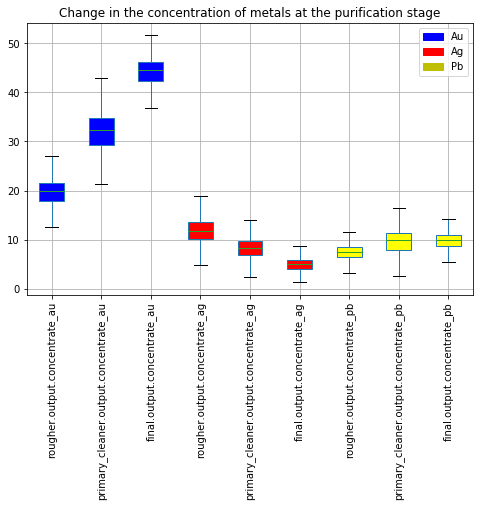

In [15]:
bp_dict = au_ag_pb.boxplot(figsize=(8,5), showfliers = False, return_type='dict', patch_artist=True)
colors=['blue','blue','blue','red','red','red','yellow','yellow','yellow']

au = mpatches.Patch(color='b', label='Au')
ag = mpatches.Patch(color='r', label='Ag')
pb = mpatches.Patch(color='y', label='Pb')
plt.legend(handles=[au,ag,pb])

plt.xticks(rotation=90)
plt.title("Change in the concentration of metals at the purification stage")

for i, box in enumerate(bp_dict['boxes']):
    box.set_facecolor(colors[i])

plt.show()

We can see that the concentration of gold increases and becomes more than double. The concentration of silver is reduced, and the concentration of lead remains approximately the same.

Let's compare the feed particle size distributions in the training set and test set. If the distributions vary significantly, the model evaluation will be incorrect.

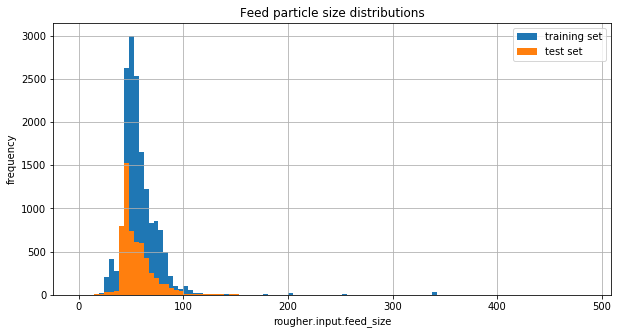

In [16]:
p=df_train['rougher.input.feed_size'].hist(bins=100, figsize=(10,5)),df_test['rougher.input.feed_size'].hist(bins=100, figsize=(10,5))
plt.xlabel('rougher.input.feed_size')
plt.ylabel('frequency')
plt.legend(['training set', 'test set'])
plt.title('Feed particle size distributions');

The distributions look similar, so we can conclude that after training our model on training set it will work well also on the test data.

Now we'll look at distribution of total concentrations of all metals at different stages: raw feed, rougher concentrate, and final concentrate. 

In [17]:
raw_feed = df_full[['rougher.input.feed_ag','rougher.input.feed_pb', 'rougher.input.feed_sol','rougher.input.feed_au']].sum(axis=1)

rougher_concentrate = df_full[['rougher.output.concentrate_ag','rougher.output.concentrate_pb', 'rougher.output.concentrate_sol','rougher.output.concentrate_au']].sum(axis=1)

final_concentrate = df_full[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']].sum(axis=1)

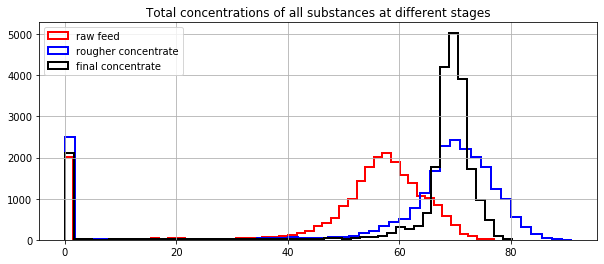

In [18]:
ax1=raw_feed.hist(bins=50, histtype='step', figsize=(10,4), lw=2, color='red', label='raw feed')
rougher_concentrate.hist(bins=50,  histtype='step', ax=ax1, lw=2,color='blue', label='rougher concentrate')
final_concentrate.hist(bins=50,  histtype='step', ax=ax1, lw=2,color='black', label='final concentrate')

plt.legend(loc='upper left')
plt.title('Total concentrations of all substances at different stages');

We can notice that there is a sharp spike at 0 values. These abnormal values should be removed. 

In [19]:
df_full = df_full[(df_full['rougher.input.feed_ag'] != 0)&(df_full['rougher.input.feed_pb']!=0)&(df_full['rougher.input.feed_sol']!=0)&(df_full['rougher.input.feed_au']!=0)&\
                  (df_full['rougher.output.concentrate_ag']!=0)&(df_full['rougher.output.concentrate_pb']!=0)&(df_full['rougher.output.concentrate_sol']!=0)&(df_full['rougher.output.concentrate_au']!=0)&\
                 (df_full['final.output.concentrate_ag']!=0)&(df_full['final.output.concentrate_pb']!=0)&(df_full['final.output.concentrate_sol']!=0)&(df_full['final.output.concentrate_au']!=0)]

In [20]:
df_train= df_train[(df_train['rougher.input.feed_ag'] != 0)&(df_train['rougher.input.feed_pb']!=0)&(df_train['rougher.input.feed_sol']!=0)&(df_train['rougher.input.feed_au']!=0)]

In [21]:
df_test = df_test[(df_test['rougher.input.feed_ag'] != 0)&(df_test['rougher.input.feed_pb']!=0)&(df_test['rougher.input.feed_sol']!=0)&(df_test['rougher.input.feed_au']!=0)]

Now we'll write a function to calculate sMAPE value. We'll use sMAPE as  evaluation metric.

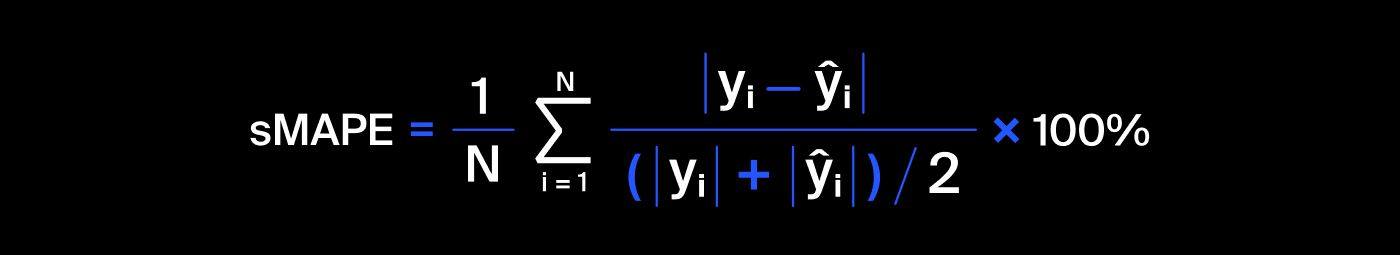

In [22]:
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred))
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0 #in case y_true=0 and y_pred=0
    return 200 * np.mean(diff)

Let's train different models.

Our target variables (rougher.output.recovery and final.output.recovery) are numeric, so we have a regression task.

In [23]:
# Delete missing values in only columns from three data sets that we need for training models
df_train = df_train.dropna()
df_test = df_test.dropna()
df_full = df_full.dropna(subset=['final.output.recovery', 'rougher.output.recovery'])

Our train set and test set don't contain targets. So we need to extract two target variebles ('rougher.output.recovery','final.output.recovery') from full dataset. We'll do it using inner merge() on 'date' column.  

In [24]:
merge_train = df_train.merge(df_full[['date','rougher.output.recovery','final.output.recovery']], on = 'date')

# target train
y_train_rougher = merge_train['rougher.output.recovery']
y_train_final = merge_train['final.output.recovery']

#features train (the same columns that test set has). We don't need "date" column for prediction. 
x_train = merge_train.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1)

In [25]:
merge_test = df_test.merge(df_full[['date','rougher.output.recovery','final.output.recovery']], on = 'date')

# target test
y_test_rougher = merge_test['rougher.output.recovery']
y_test_final = merge_test['final.output.recovery']

#features test. We don't need "date" column for prediction
x_test = merge_test.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1)

Let's start with Linear Regression.

In [26]:
# scale the numeric data using StandardScaler() from sklearn.preprocessing module.
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
   
# train Linear Regression for rougher.output
model = LinearRegression()  
model.fit(x_train, y_train_rougher)
y_predicted_test = model.predict(x_test)

# find smape for rougher using above function smape
smape_rougher = smape(y_test_rougher, y_predicted_test)
print('sMAPE for rougher output:', smape_rougher) 

sMAPE for rougher output: 4.916207855825235


In [27]:
# train Linear Regression for final.output
model = LinearRegression()  
model.fit(x_train, y_train_final)
y_predicted_test = model.predict(x_test)

smape_final = smape(y_test_final, y_predicted_test)
print('sMAPE for final output:', smape_final)

sMAPE for final output: 7.924350998460039


The final metric includes the two values:

#### final smape = 0.25 * smape_rougher + 0.75 * smape_final

In [28]:
final_smape = 0.25*smape_rougher + 0.75*smape_final
print('Final sMAPE Linear Regression:', final_smape)

Final sMAPE Linear Regression: 7.172315212801338


Let's train RandomForestRegressor

Now we'll iterate over n_estimators values from 10 to 50 and check the final_smape. Limit the maximum depth to 10. In oder to tune parameters we'll split train dataset into two parts: train (75%) and validation set (25%)

In [29]:
#  split data into training and validation 
df_train,df_valid=train_test_split(merge_train, test_size=0.25, random_state=1245)

#  declare variables for features and target feature 
x_train_ = df_train.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1)
y_train_rougher_ = df_train['rougher.output.recovery']
y_train_final_ = df_train['final.output.recovery']

x_valid = df_valid.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1)
y_valid_rougher = df_valid['rougher.output.recovery']
y_valid_final = df_valid['final.output.recovery']


In [30]:
for estim in range(10,51,10):
    model = RandomForestRegressor(n_estimators=estim, max_depth=10, random_state=12345)
    model.fit(x_train_, y_train_rougher_)
    y_predicted_valid = model.predict(x_valid)
        
    smape_rougher = smape(y_valid_rougher, y_predicted_valid)
    
    model.fit(x_train_, y_train_final_)
    y_predicted_valid = model.predict(x_valid)
    smape_final = smape(y_valid_final, y_predicted_valid)
    
    final_smape = 0.25*smape_rougher + 0.75*smape_final
    print('n_estimators:', estim)
    print('Final sMAPE:', final_smape)
       

n_estimators: 10
Final sMAPE: 5.382168424568925
n_estimators: 20
Final sMAPE: 5.314886284523738
n_estimators: 30
Final sMAPE: 5.282707577317404
n_estimators: 40
Final sMAPE: 5.268651356528822
n_estimators: 50
Final sMAPE: 5.262800094952634


We can see that with n_estimators = 50 we get the best result (the smalest sMAPE).

Now we'll check our model on test set.

In [31]:
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=12345)
model.fit(x_train, y_train_rougher)
y_predicted_test = model.predict(x_test)
        
smape_rougher = smape(y_test_rougher, y_predicted_test)
    
model.fit(x_train, y_train_final)
y_predicted_test = model.predict(x_test)
smape_final = smape(y_test_final, y_predicted_test)
    
final_smape = 0.25*smape_rougher + 0.75*smape_final
print('Final sMAPE:', final_smape)
       

Final sMAPE: 6.962749934586018


So we have sMAPE for Linear Regression is equal to 7.17%. 

sMAPE for Random Forest Regressor with parameters n_estimators = 50 and max_depth = 10 is equal to 6.96%. 

Random Forest Regressor is slower than Linear Regression, but gives us a better result.

#### We can conclude that the best model for predicting the amount of gold recovered from gold ore is Random Forest Regressor with parameters n_estimators = 50 and max_depth = 10.

